# EDA with prompt ChatGPT

 Develop a Python program that performs the following exploratory data analysis (EDA) tasks on a CSV file provided by user german_credit_data.csv:
Reading CSV file: Load the CSV file into a DataFrame using the pandas library.
Initial display: Displays the first 5 rows of the dataset.
Dataset overview: Provides an informative summary of the dataset, including the number of rows and columns, the data types of each column, and the number of non-null values.
Statistical description: Generates a statistical summary of the dataset, including metrics such as mean, median, standard deviation, minimum, maximum, and quartiles for numeric columns.
Correlation matrix: Calculates the correlation matrix for numeric variables in the dataset.
Heatmap: Visualize the correlation matrix using a heatmap with the seaborn or matplotlib library, making sure that the correlation values ​​are readable and the plot is well labeled.
The program should be modular, easy to understand, and well-commented. It should also include error handling for cases such as a missing CSV file, non-numeric columns in the correlation matrix, or formatting issues in the file.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file path
file_path = "german_credit_data.csv"

def load_data(file_path):
    """Load the CSV file into a Pandas DataFrame with error handling."""
    try:
        df = pd.read_csv(file_path)
        print("File successfully loaded!")
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: File is empty.")
        return None
    except pd.errors.ParserError:
        print("Error: File could not be parsed.")
        return None

def display_head(df, n=5):
    """Display the first n rows of the DataFrame."""
    print("\nFirst 5 rows of the dataset:")
    print(df.head(n))

def dataset_overview(df):
    """Display an informative summary of the dataset."""
    print("\nDataset Overview:")
    print(f"Number of Rows: {df.shape[0]}, Number of Columns: {df.shape[1]}\n")
    print("Column Data Types and Non-null Counts:")
    print(df.info())

def statistical_summary(df):
    """Generate and display a statistical summary of numeric columns."""
    print("\nStatistical Summary:")
    print(df.describe())

def correlation_matrix(df):
    """Calculate and display the correlation matrix."""
    print("\nCorrelation Matrix:")
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    if numeric_df.shape[1] == 0:
        print("No numeric columns found for correlation matrix.")
        return None
    corr_matrix = numeric_df.corr()
    print(corr_matrix)
    return corr_matrix

def plot_heatmap(corr_matrix):
    """Visualize the correlation matrix using a heatmap."""
    if corr_matrix is not None:
        plt.figure(figsize=(10, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Matrix Heatmap")
        plt.show()


File successfully loaded!

First 5 rows of the dataset:
   Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   credit amount  duration              purpose  risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  

Dataset Overview:
Number of Rows: 1000, Number of Columns: 11

Column Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

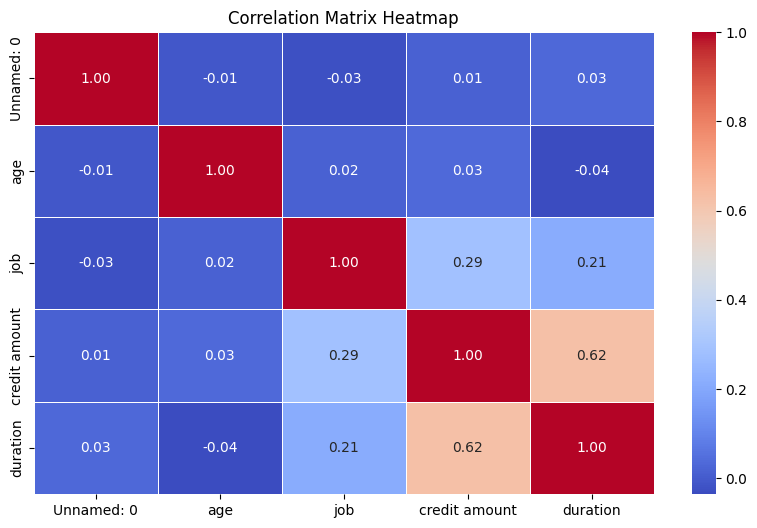

In [4]:
# Run the EDA steps
df = load_data(file_path)
if df is not None:
    display_head(df)
    dataset_overview(df)
    statistical_summary(df)
    corr_matrix = correlation_matrix(df)
    plot_heatmap(corr_matrix)